In [1]:
import itk
import matplotlib.pyplot as plt


paths = ["D:/Download/Task08_HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_001.nii.gz", 
         "D:/Download/Task08_HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_002.nii.gz",
        "D:/Download/Task08_HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_004.nii.gz",
        "D:/Download/Task08_HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_005.nii.gz",
        "D:/Download/Task08_HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_007.nii.gz",
        "D:/Download/Task08_HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_008.nii.gz",
        "D:/Download/Task08_HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_010.nii.gz",
        "D:/Download/Task08_HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_011.nii.gz",
        "D:/Download/Task08_HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_013.nii.gz",
        "D:/Download/Task08_HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_016.nii.gz"]



#Hessian3D


alpha1 = 0.5
alpha2 = 2.0
sigma = 1.0

i = 1

for path in paths : 
    
    input_image = itk.imread(path)
    hessian_image = itk.hessian_recursive_gaussian_image_filter(
        input_image, sigma=sigma)

    vesselness_filter = itk.Hessian3DToVesselnessMeasureImageFilter[
    itk.ctype("float")].New()
    vesselness_filter.SetInput(hessian_image)
    vesselness_filter.SetAlpha1(alpha1)
    vesselness_filter.SetAlpha2(alpha2)
    itk.imwrite(vesselness_filter, "D:/Download/Res/hessian"+str(i)+".nii.gz" )
    i = i+1


In [2]:
#sato 


sigma_min = 1
sigma_max = 10 
step_numbers = 10 

i= 1
for path in paths : 
    
    input_image = itk.imread(path)
    ImageType = type(input_image)
    Dimension = input_image.GetImageDimension()
    HessianPixelType = itk.SymmetricSecondRankTensor[itk.D, Dimension]
    HessianImageType = itk.Image[HessianPixelType, Dimension]
    
    objectness_filter = itk.Hessian3DToVesselnessMeasureImageFilter[
    itk.ctype("float")].New()
    objectness_filter.SetAlpha1(alpha1)
    objectness_filter.SetAlpha2(alpha2)
    
    
    multi_scale_filter = itk.MultiScaleHessianBasedMeasureImageFilter[ImageType, HessianImageType, ImageType].New()
    multi_scale_filter.SetInput(input_image)
    multi_scale_filter.SetHessianToMeasureFilter(objectness_filter)
    multi_scale_filter.SetSigmaStepMethodToLogarithmic()
    multi_scale_filter.SetSigmaMinimum(sigma_min)
    multi_scale_filter.SetSigmaMaximum(sigma_max)
    multi_scale_filter.SetNumberOfSigmaSteps(step_numbers)

    OutputPixelType = itk.UC
    OutputImageType = itk.Image[OutputPixelType, Dimension]

    rescale_filter = itk.RescaleIntensityImageFilter[ImageType, OutputImageType].New()
    rescale_filter.SetInput(multi_scale_filter)
    itk.imwrite(rescale_filter.GetOutput(), "D:/Download/Res/sato"+str(i)+".nii.gz" )
    i = i+1


In [3]:
#Franji

sigma_min = 1
sigma_max = 10 
step_numbers = 10 


i = 1

for path in paths :
    
    input_image = itk.imread(path)

    objectness_filter = itk.HessianToObjectnessMeasureImageFilter[HessianImageType, ImageType].New()
    objectness_filter.SetBrightObject(False)
    objectness_filter.SetScaleObjectnessMeasure(False)
    objectness_filter.SetAlpha(0.5)
    objectness_filter.SetBeta(1.0)
    objectness_filter.SetGamma(5.0)

    multi_scale_filter = itk.MultiScaleHessianBasedMeasureImageFilter[ImageType, HessianImageType, ImageType].New()
    multi_scale_filter.SetInput(input_image)
    multi_scale_filter.SetHessianToMeasureFilter(objectness_filter)
    multi_scale_filter.SetSigmaStepMethodToLogarithmic()
    multi_scale_filter.SetSigmaMinimum(sigma_min)
    multi_scale_filter.SetSigmaMaximum(sigma_max)
    multi_scale_filter.SetNumberOfSigmaSteps(step_numbers)

    OutputPixelType = itk.UC
    OutputImageType = itk.Image[OutputPixelType, Dimension]

    rescale_filter = itk.RescaleIntensityImageFilter[ImageType, OutputImageType].New()
    rescale_filter.SetInput(multi_scale_filter)

    itk.imwrite(rescale_filter.GetOutput(),"D:/Download/Res/frangi"+str(i)+".nii.gz")
    i = i+1

In [4]:
image_hessian = itk.imread("D:/Download/Res/hessian6.nii.gz")

In [5]:
np_copy = itk.array_from_image(image_hessian)
np_copy.shape

(47, 512, 512)

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


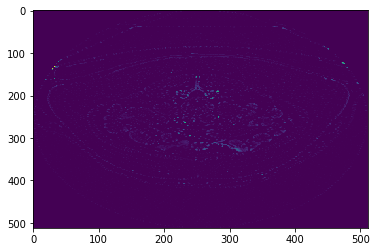

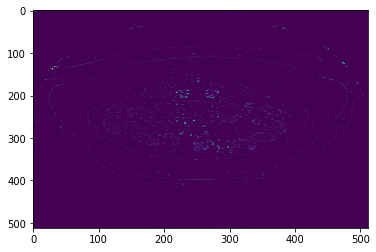

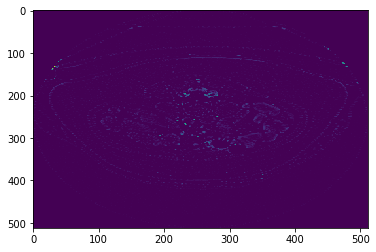

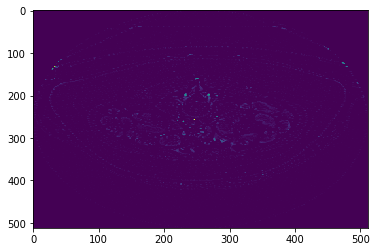

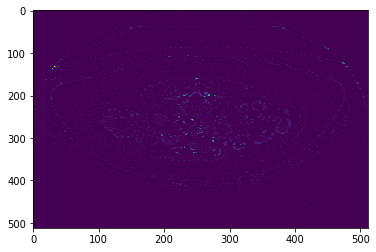

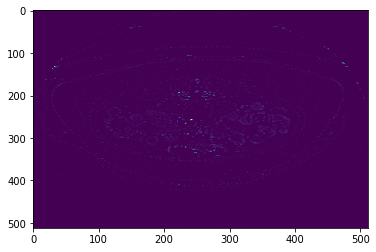

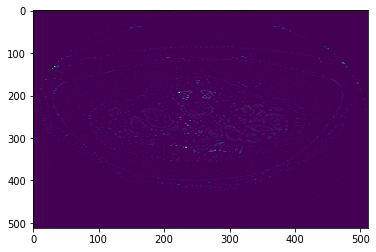

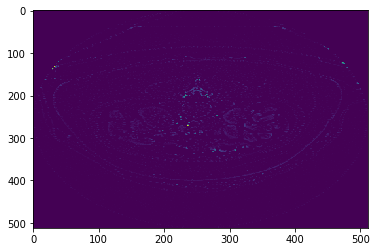

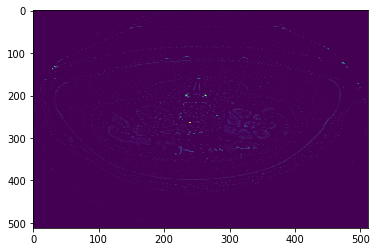

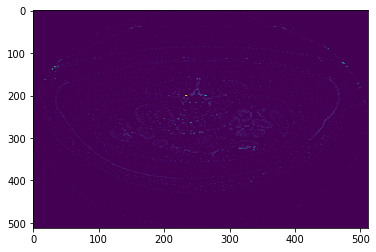

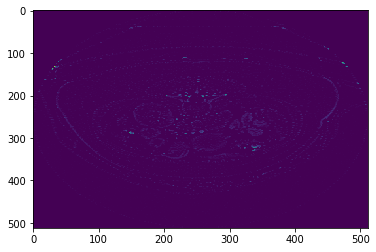

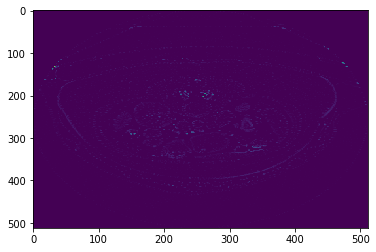

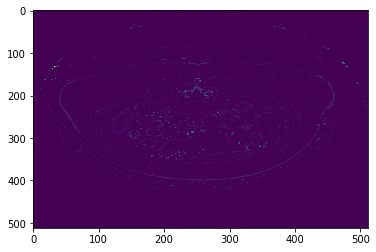

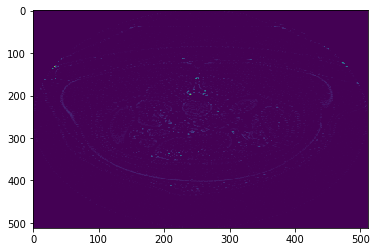

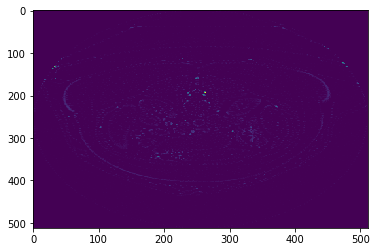

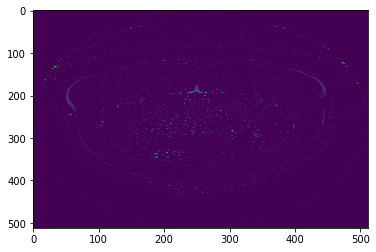

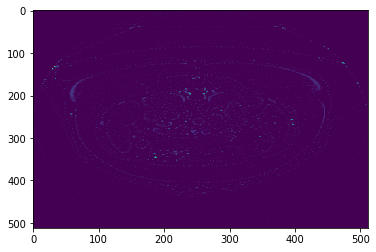

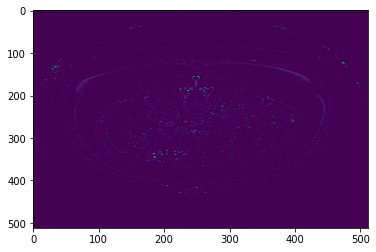

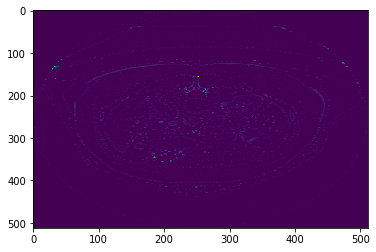

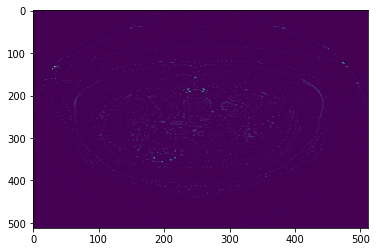

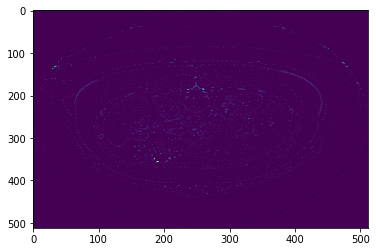

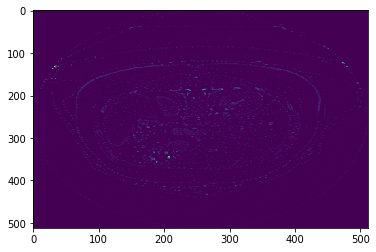

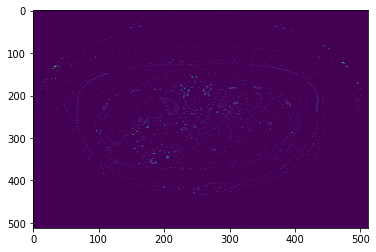

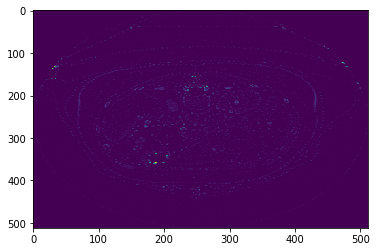

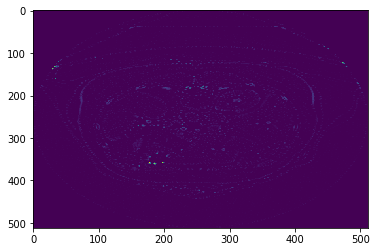

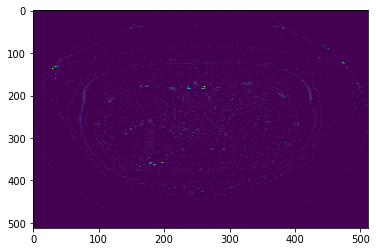

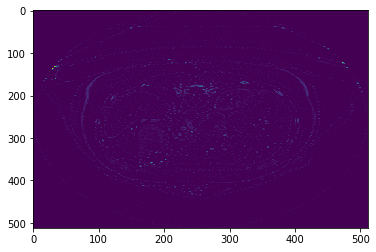

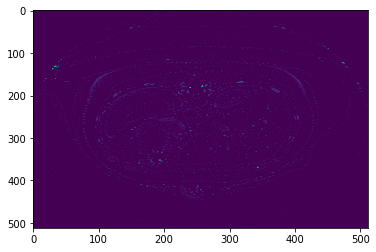

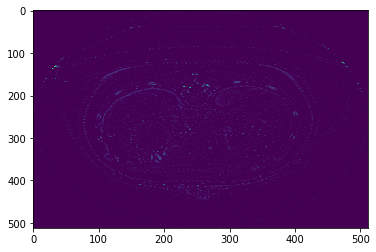

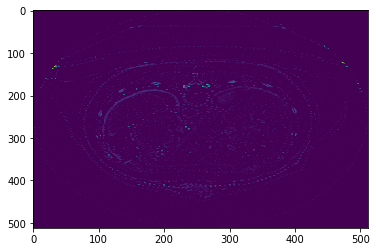

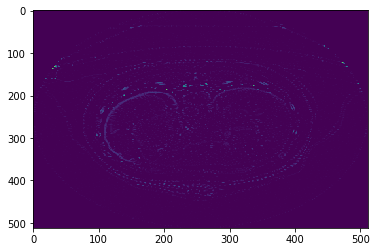

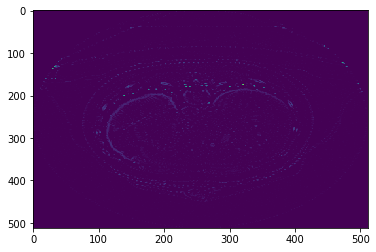

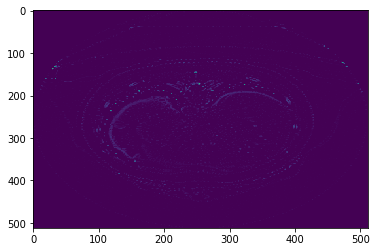

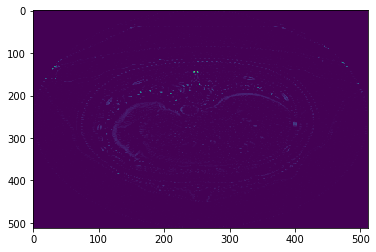

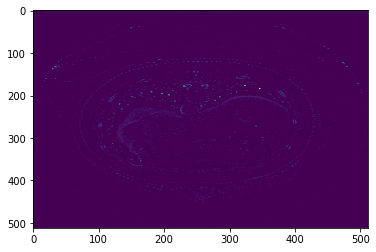

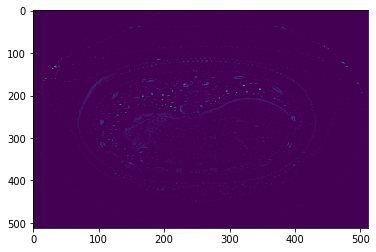

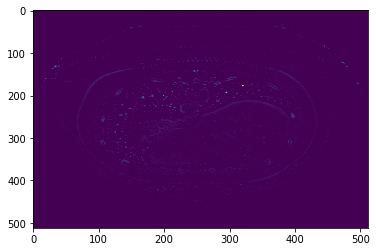

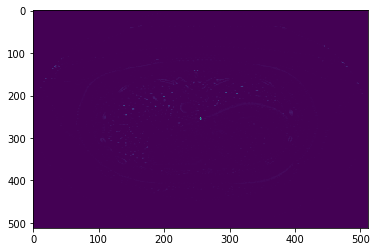

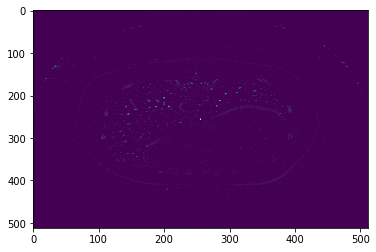

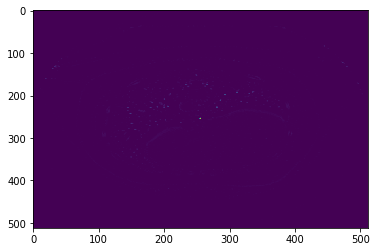

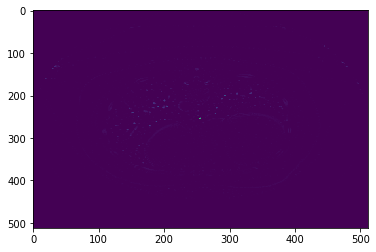

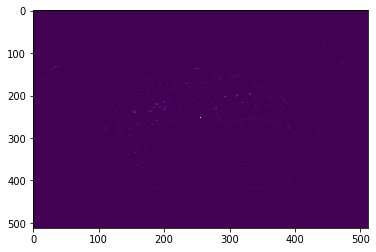

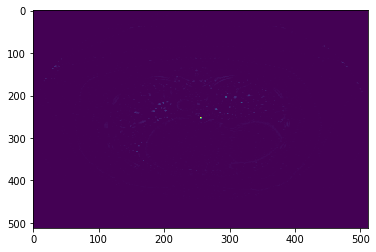

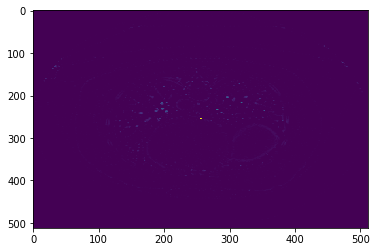

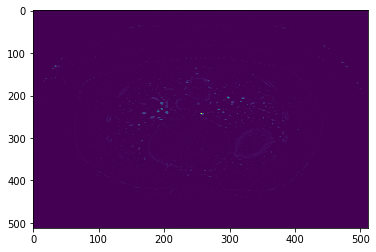

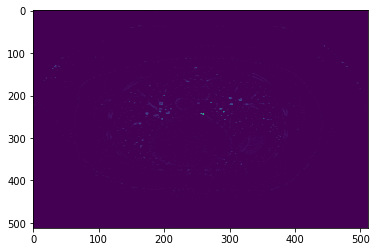

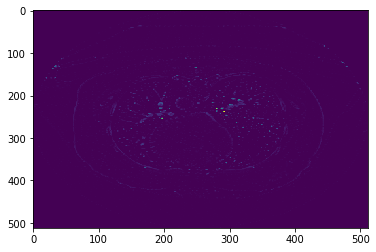

In [6]:
for im in np_copy :
    fig, axes = plt.subplots(1, 1)
    axes.imshow(im, aspect='auto')
    
plt.show()


In [7]:
image_sato = itk.imread("D:/Download/Res/sato6.nii.gz")

In [8]:
np_copy = itk.array_from_image(image_sato)
np_copy.shape

(47, 512, 512)

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


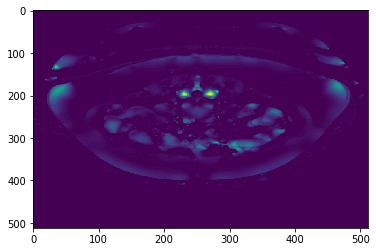

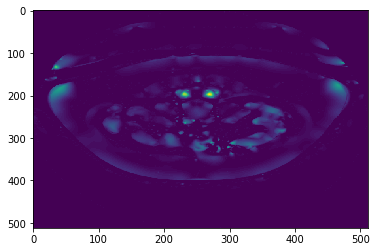

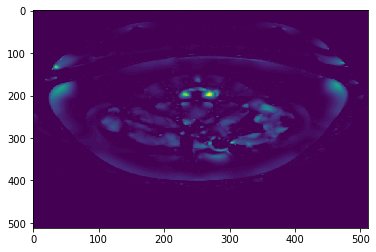

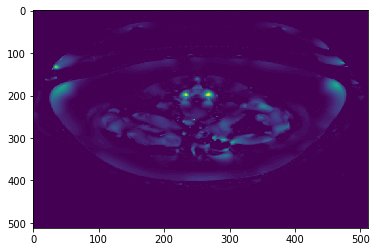

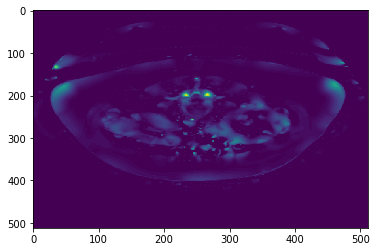

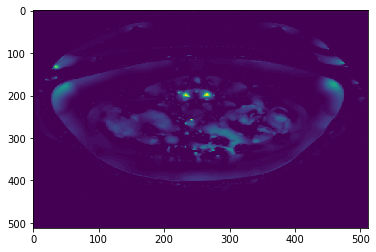

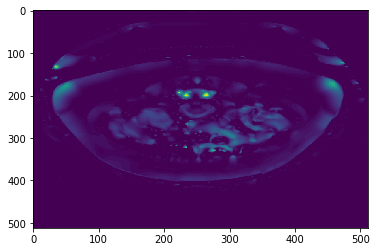

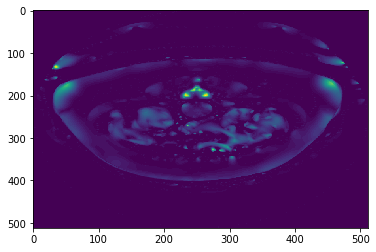

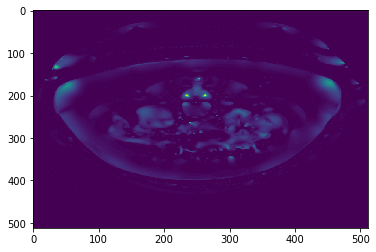

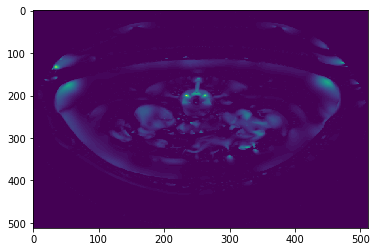

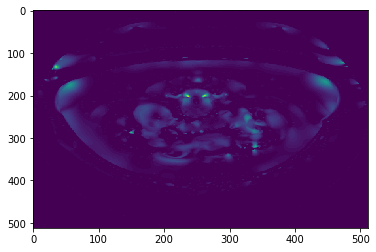

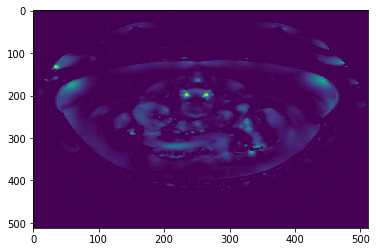

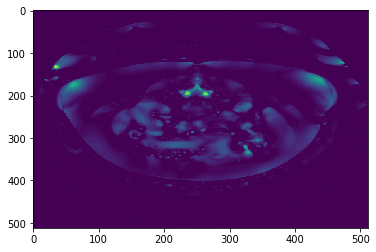

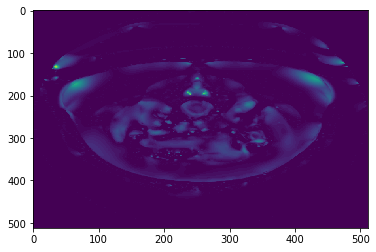

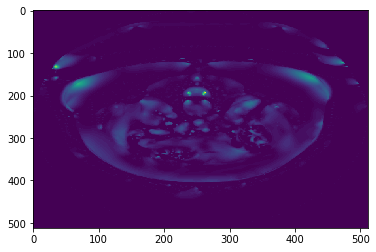

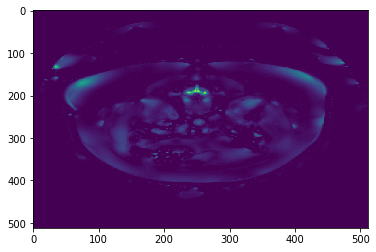

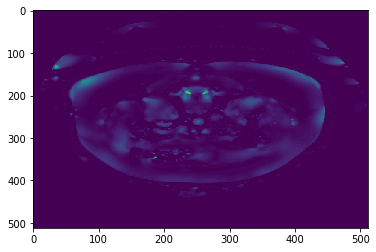

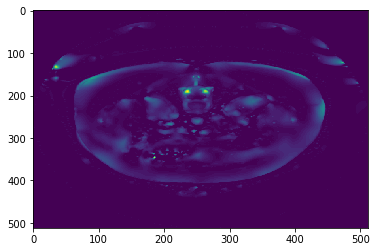

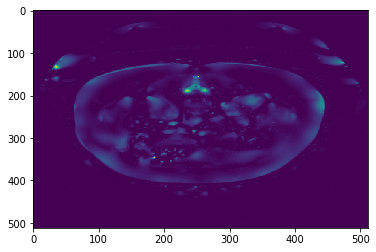

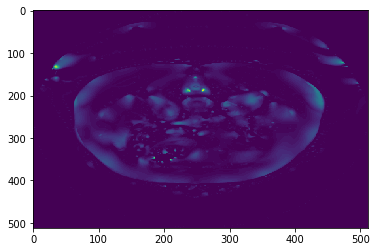

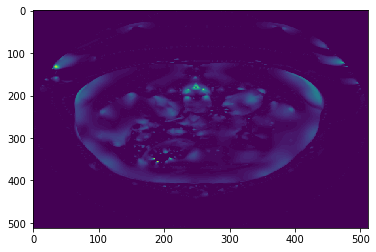

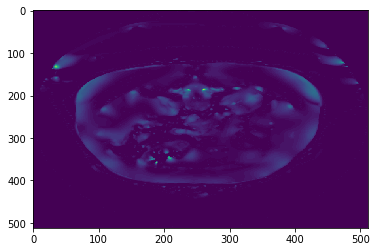

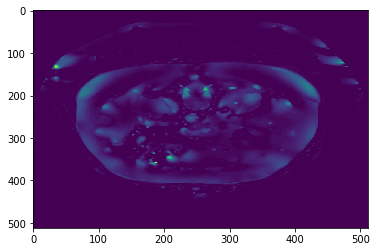

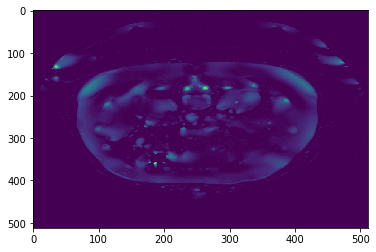

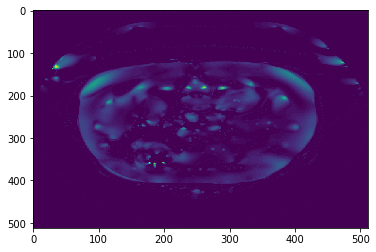

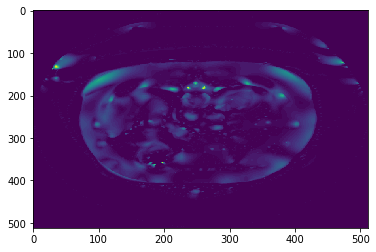

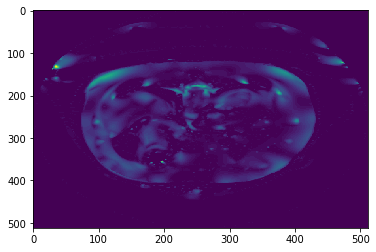

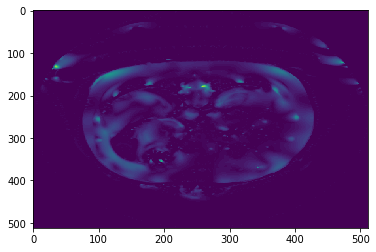

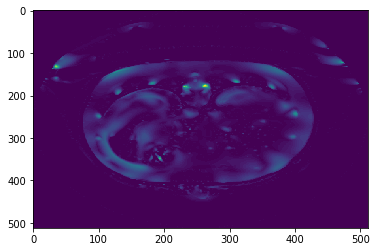

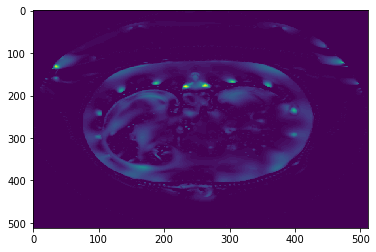

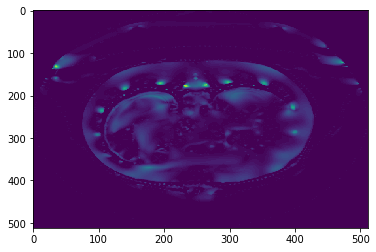

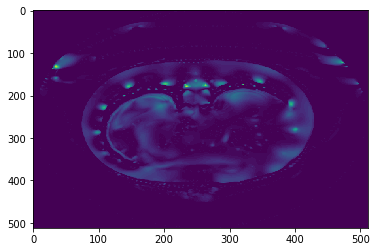

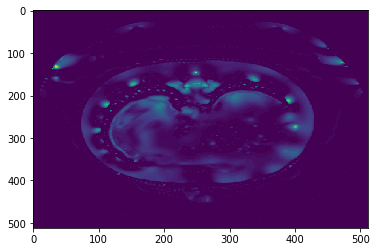

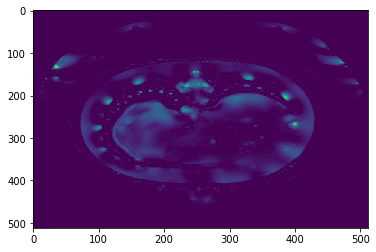

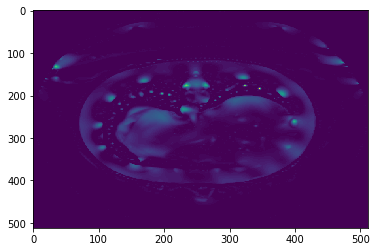

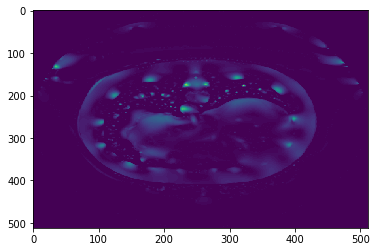

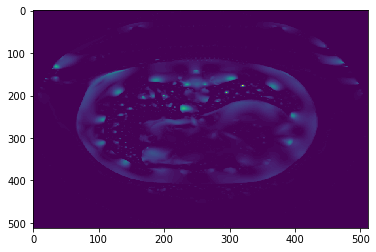

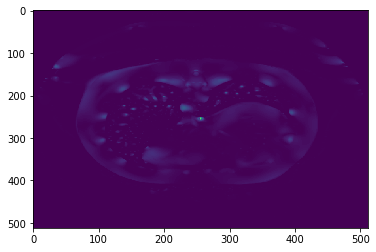

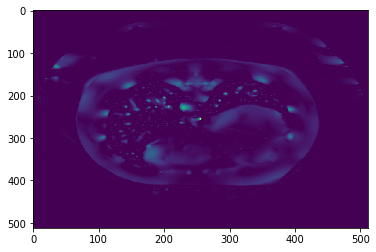

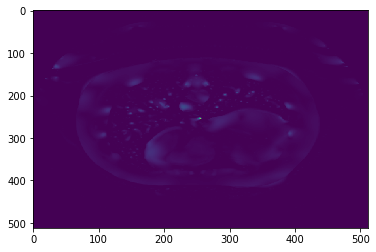

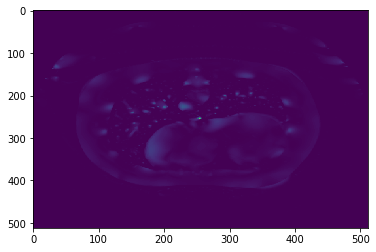

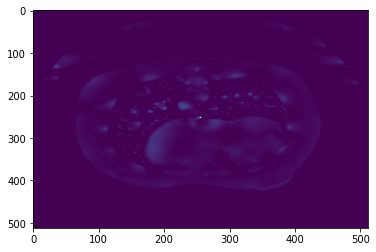

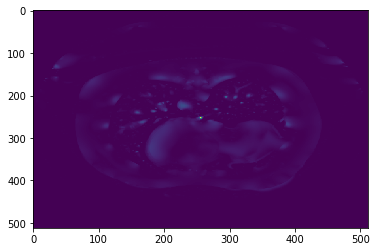

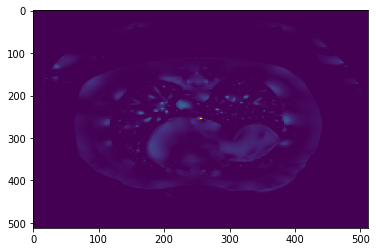

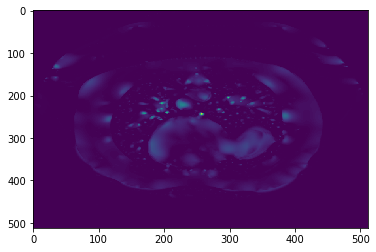

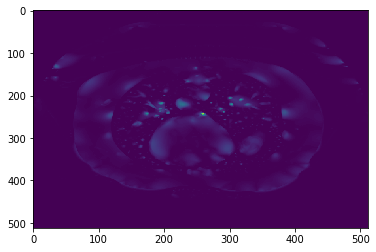

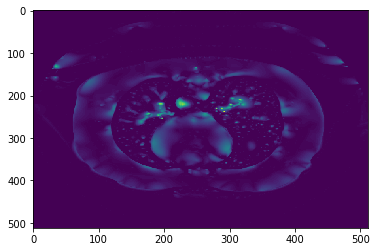

In [9]:
for im in np_copy :
    fig, axes = plt.subplots(1, 1)
    axes.imshow(im, aspect='auto')
    
plt.show()

In [10]:
image_frangi = itk.imread("D:/Download/Res/frangi6.nii.gz")
np_copy = itk.array_from_image(image_frangi)
np_copy.shape

(47, 512, 512)

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


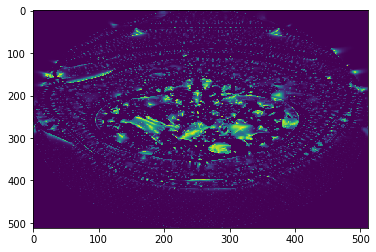

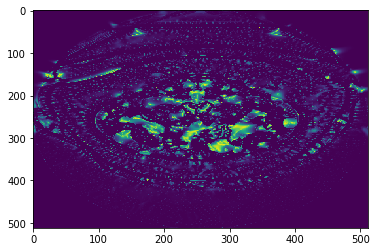

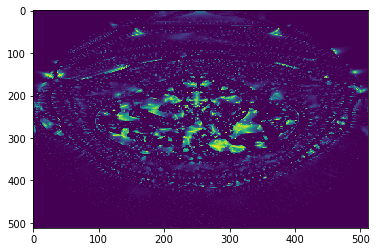

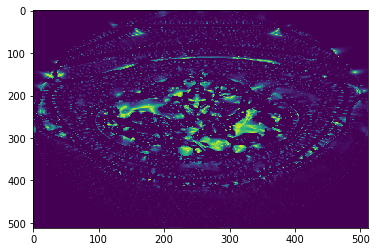

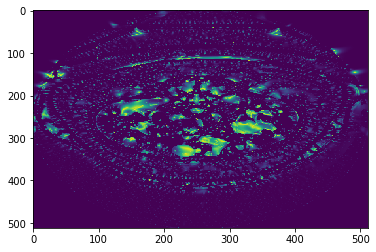

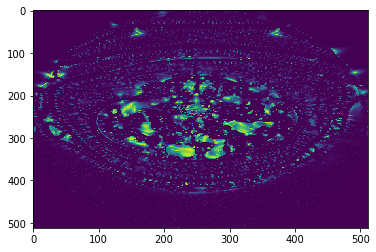

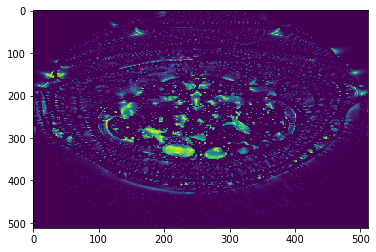

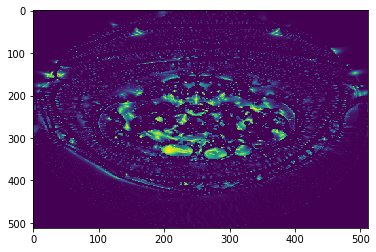

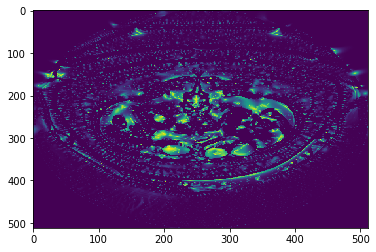

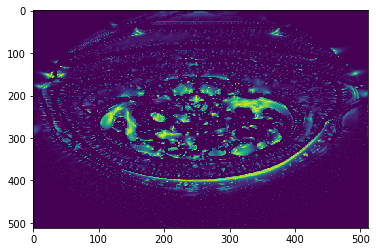

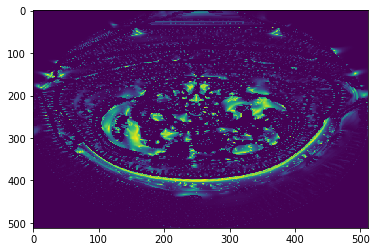

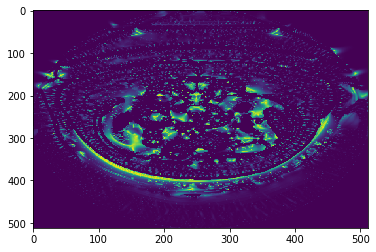

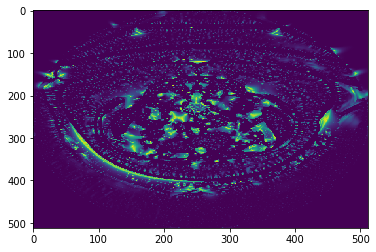

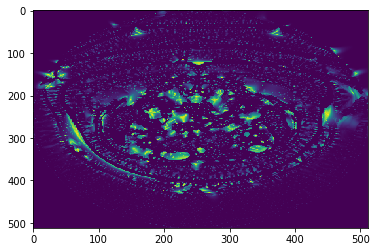

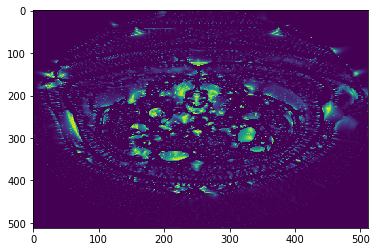

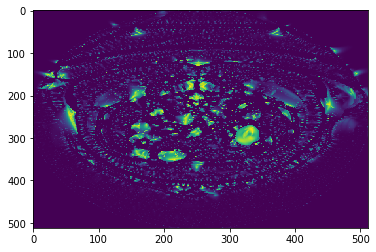

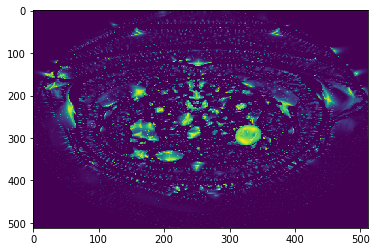

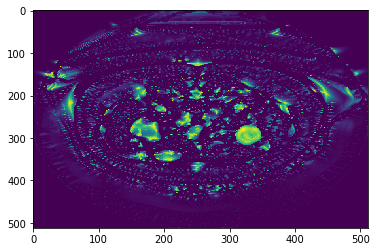

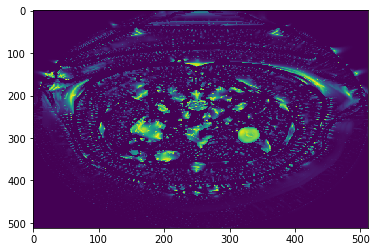

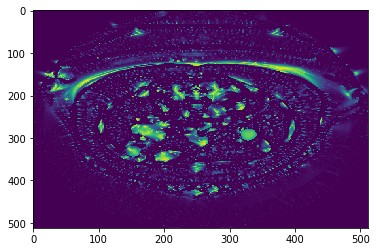

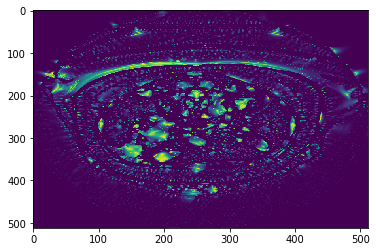

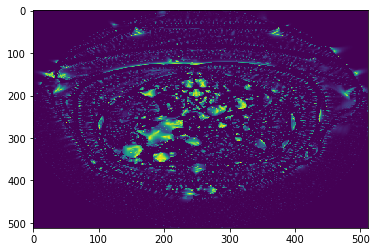

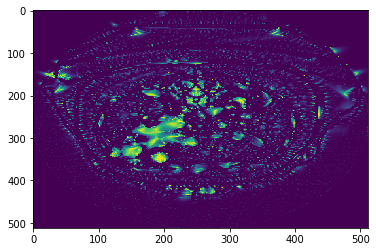

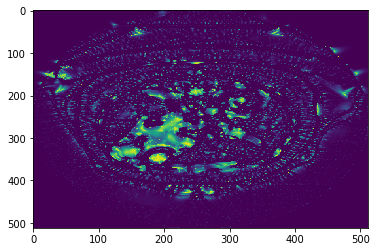

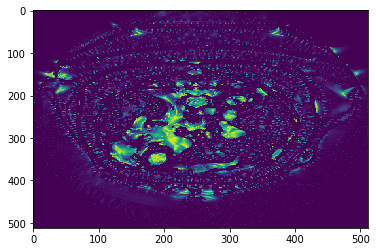

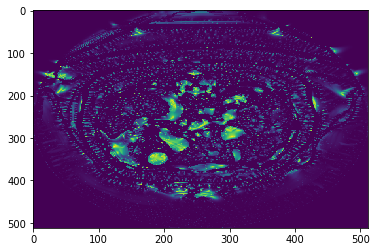

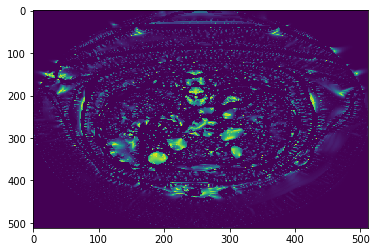

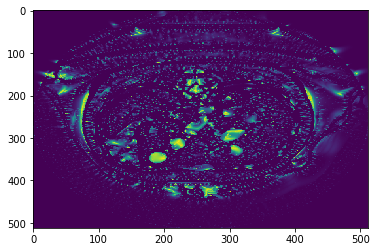

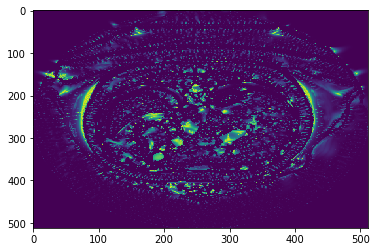

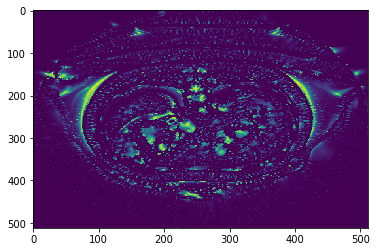

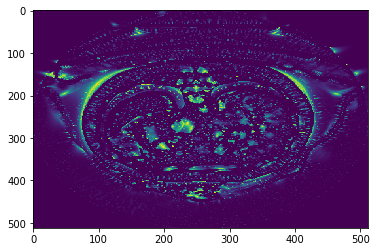

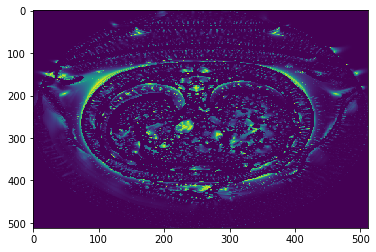

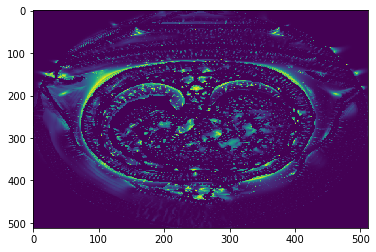

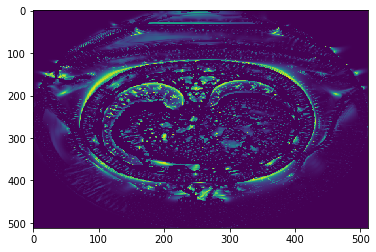

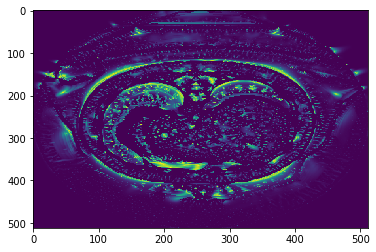

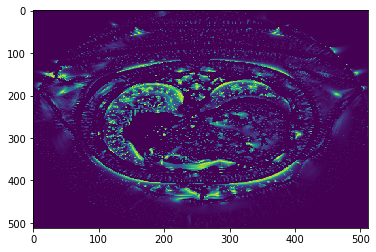

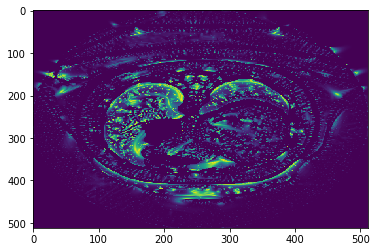

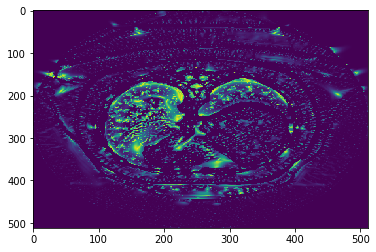

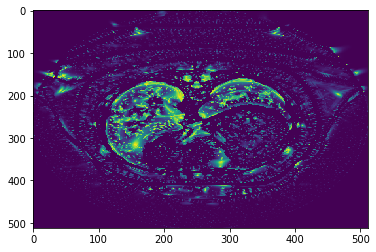

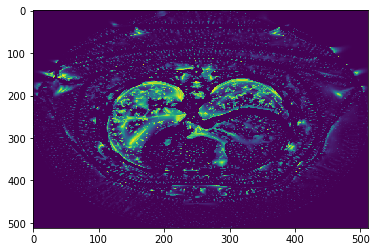

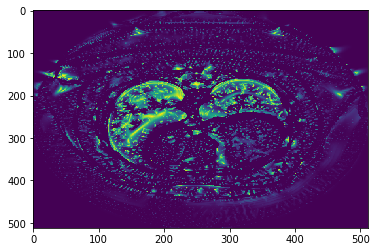

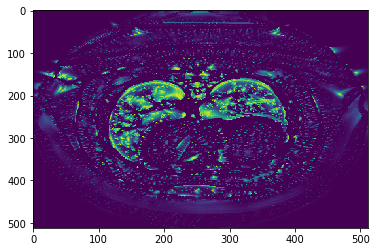

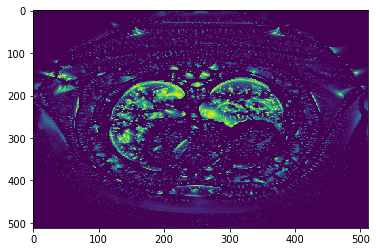

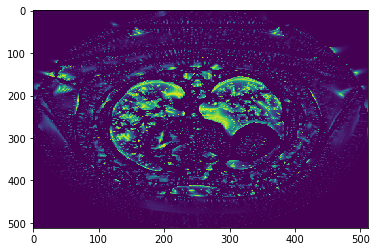

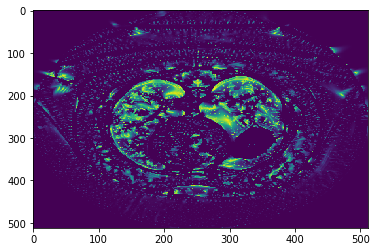

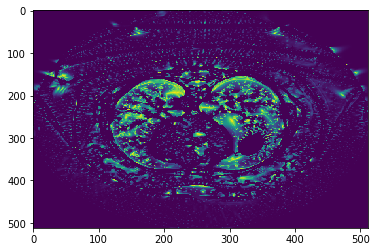

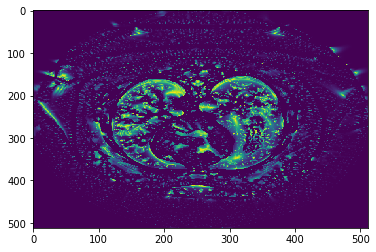

In [11]:
for im in np_copy :
    fig, axes = plt.subplots(1, 1)
    axes.imshow(im, aspect='auto')
    
plt.show()

In [13]:
from sklearn.metrics import roc_curve, auc

label = itk.imread("D:/Download/Task08_HepaticVessel/Task08_HepaticVessel/labelsTr/hepaticvessel_008.nii.gz")

In [14]:
label_array = itk.array_from_image(label)
hessian_array = itk.array_from_image(image_hessian)
sato_array = itk.array_from_image(image_sato)
frangi_array = itk.array_from_image(image_frangi)
label_array.shape

(47, 512, 512)

In [15]:
source = itk.imread("D:/Download/Task08_HepaticVessel/Task08_HepaticVessel/imagesTr/hepaticvessel_008.nii.gz")

In [16]:
source_array = itk.array_from_image(source)
source_array.shape

(47, 512, 512)

In [17]:
source_array = source_array.ravel()
label_array = label_array.ravel()
hessian_array = hessian_array.ravel()
sato_array = sato_array.ravel()
frangi_array = frangi_array.ravel()


In [18]:
for i in range (len(label_array)) : 
    if label_array[i] == 0 : 
        label_array[i] = 0
    if label_array[i] == 1 : 
        label_array[i] = 0
    if label_array[i] == 2 : 
        label_array[i] = 1
    

In [19]:
hessian_array = hessian_array/255
fpr_hessian, tpr_hessian, seuil_hessian = roc_curve(label_array,hessian_array)

In [20]:
sato_array = sato_array/255
fpr_sato, tpr_sato, seuil_sato = roc_curve(label_array,sato_array)

frangi_array = frangi_array/255
fpr_frangi, tpr_frangi, seuil_frangi = roc_curve(label_array,frangi_array)

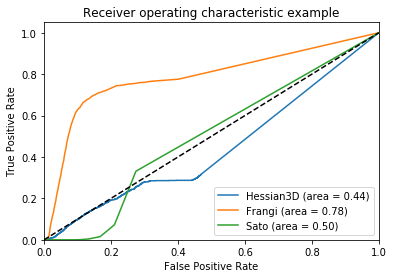

In [22]:
roc_auc_hessian = auc(fpr_hessian,tpr_hessian)
roc_auc_frangi = auc(fpr_frangi,tpr_frangi)
roc_auc_sato = auc(fpr_sato,tpr_sato)




fig, ax = plt.subplots(1,1)
ax.plot(fpr_hessian, tpr_hessian, label='Hessian3D (area = %0.2f)' % roc_auc_hessian)
ax.plot(fpr_frangi, tpr_frangi, label='Frangi (area = %0.2f)' % roc_auc_frangi)
ax.plot(fpr_sato, tpr_sato, label='Sato (area = %0.2f)' % roc_auc_sato)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
ax.legend(loc="lower right")

array([3.98244953e+11, 2.98244953e+11, 2.56487280e+10, ...,
       2.80259693e-34, 1.40129846e-34, 0.00000000e+00])